# Table of Contents
Introduction
Import
Analysis & Preprocessing
Model
Training
Analysis & Conclusion

# 1. Introduction
References:

- https://machinelearningmastery.com/feature-selection-for-regression-data/
- https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/
- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/
- https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared#:~:text=MAE%3A%20It%20is%20not%20very,the%20weighted%20individual%20differences%20equally.

# 2. Import

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils, callbacks
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import matplotlib.pyplot as plt
import numpy as np 
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 3. Analysis & Preprocessing

In [2]:
data = pd.read_excel('../../data_sets/Volumetric_features.xlsx')
data_feat = pd.DataFrame(data, columns = data.columns[:-1])
data_feat = data_feat.drop(['S.No','Age'], axis=1)

data.head(5)
data.describe()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000
mean,2113.500000,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,...,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586,4.533838
std,1220.085448,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,...,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099,3.057928
min,1.000000,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,...,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000,1.000000
25%,1057.250000,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,...,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000,1.000000
50%,2113.500000,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,...,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000,4.000000
75%,3169.750000,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,...,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000,8.000000
max,4226.000000,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,...,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000,9.000000


In [3]:
scaler = StandardScaler()
x = scaler.fit_transform(data)
n = 20
pca = PCA(n_components=n)
pca_data = pca.fit_transform(x)

labels = data.columns.values.tolist()
label_index = [np.abs(pca.components_[i]).argmax() for i in range(n)]
columns = [labels[label_index[i]] for i in range(n)]

pca_df = pd.DataFrame(data=pca_data, columns=columns)
print(pca_df.head)
pca_df.head()

<bound method NDFrame.head of       rh_MeanThickness_thickness  CerebralWhiteMatterVol  \
0                       2.116693                1.364191   
1                       1.781763                1.577276   
2                       2.423065                1.424486   
3                       4.657487                1.366376   
4                       3.795704                1.701513   
...                          ...                     ...   
4221                    3.332053                2.220377   
4222                    4.258130               -2.535944   
4223                    7.826457                2.169780   
4224                   -0.702316                2.439424   
4225                   -2.373678               -3.566135   

      Left-Lateral-Ventricle  lh_lateralorbitofrontal_thickness  SurfaceHoles  \
0                   1.509738                          -2.002542     -1.880681   
1                   1.751879                          -1.118448     -1.486195   
2     

,rh_MeanThickness_thickness,CerebralWhiteMatterVol,Left-Lateral-Ventricle,lh_lateralorbitofrontal_thickness,SurfaceHoles,CC_Posterior,rh_entorhinal_thickness,CC_Posterior,Right-Caudate,MaskVol-to-eTIV,rh_frontalpole_thickness,MaskVol-to-eTIV,Right-Cerebellum-White-Matter,MaskVol-to-eTIV,Left-vessel,non-WM-hypointensities,lh_caudalanteriorcingulate_thickness,5th-Ventricle,non-WM-hypointensities,non-WM-hypointensities
0,2.116693,1.364191,1.509738,-2.002542,-1.880681,2.278202,-1.648855,-0.011644,-0.458969,1.810743,-0.668529,0.109944,-1.141238,1.576612,-1.046274,-0.414457,0.137179,0.668323,-0.278374,0.585567
1,1.781763,1.577276,1.751879,-1.118448,-1.486195,2.075799,-1.814979,-0.369271,-0.918797,1.998003,-0.610768,0.505767,-0.918977,1.498072,-1.465700,-0.787135,-0.469268,0.405115,-0.237538,0.762405
2,2.423065,1.424486,1.583671,-1.542656,-1.246317,1.772968,-2.457122,-0.634560,-1.260260,1.776340,-0.738290,0.492492,-0.476125,1.777970,-1.045709,-0.873142,-0.289058,0.083622,0.102540,0.199502
3,4.657487,1.366376,1.174550,-0.637088,-1.459873,2.255091,-1.240476,-0.939504,-1.082391,1.561048,-0.528174,0.028773,-0.528027,1.901717,-1.419796,-0.270695,-0.324507,0.442483,0.018752,0.287582
4,3.795704,1.701513,2.226951,-1.242501,-1.388356,2.820242,-1.689395,-0.277617,-0.695485,1.820614,-0.828457,0.417255,-0.992883,2.106391,-0.663778,-0.666856,-0.513133,0.942842,-0.201809,0.898185


In [4]:
# Split for validation --> train, val, test = 80/15/5
# train to test (val and test) --> include random shuffle
x_train, x_validation, y_train, y_validation = train_test_split(pca_df, data['Age'], test_size=0.20, random_state=33)

# (20% of total dataset -> 75% validation = 15% total, 25% validation = 5% total
# val and test --> include random shuffle
x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (3380, 20)
y_train shape is: (3380,) 

x_val shape is: (634, 20)
y_val shape is: (634,) 

x_test shape is: (212, 20)
y_test shape is: (212,)


# 4. Model

In [35]:
# end with 3 neurons for each class --> 1 (Normal), 2 (Suspect) and 3 (Pathological)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=x_train.shape[1], name='input'))

model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1, activation='linear', name='output'))


opt = Adam(learning_rate=0.001)

model.compile(
            loss='mean_absolute_error',
            optimizer=opt,
            metrics= ['mean_absolute_error']
            )

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                1344      
                                                                 
 activation_29 (Activation)  (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 128)               8320      
                                                                 
 activation_30 (Activation)  (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               33024     
                                                                 
 activation_31 (Activation)  (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 128)              

# 5. Training

In [36]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=10, restore_best_weights = True)
# loss function
msle = MeanSquaredLogarithmicError()

model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.001), 
    metrics=['msle']
)
# train the model
hist = model.fit(
    x_train, 
    y_train, 
    epochs=100, 
    batch_size=256,
    verbose=1,
    validation_data=(x_val, y_val), 
    callbacks = [earlystopping]
)

Epoch 1/100
14/14 [==============================] - 1s 22ms/step - loss: 8.2075 - msle: 8.2075 - val_loss: 1.6454 - val_msle: 1.6454
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6331 - msle: 0.6331 - val_loss: 0.3557 - val_msle: 0.3557
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.3920 - msle: 0.3920 - val_loss: 0.3242 - val_msle: 0.3242
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2450 - msle: 0.2450 - val_loss: 0.1901 - val_msle: 0.1901
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 0.1906 - msle: 0.1906 - val_loss: 0.1701 - val_msle: 0.1701
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.1669 - msle: 0.1669 - val_loss: 0.1510 - val_msle: 0.1510
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.1471 - msle: 0.1471 - val_loss: 0.1353 - val_msle: 0.1353
Epoch 8/100
14/14 [==============================] - 0s 7ms/step - l

14/14 [==============================] - 0s 7ms/step - loss: 0.0126 - msle: 0.0126 - val_loss: 0.0304 - val_msle: 0.0304
Epoch 63/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0126 - msle: 0.0126 - val_loss: 0.0316 - val_msle: 0.0316
Epoch 64/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0125 - msle: 0.0125 - val_loss: 0.0324 - val_msle: 0.0324
Epoch 65/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0129 - msle: 0.0129 - val_loss: 0.0310 - val_msle: 0.0310
Epoch 66/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0121 - msle: 0.0121 - val_loss: 0.0303 - val_msle: 0.0303
Epoch 67/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0116 - msle: 0.0116 - val_loss: 0.0297 - val_msle: 0.0297
Epoch 68/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0114 - msle: 0.0114 - val_loss: 0.0302 - val_msle: 0.0302
Epoch 69/100
14/14 [==============================] - 0s 8ms/step - loss: 0

# 6. Analysis & Conclusion

In [37]:
y_pred = model.predict(x_test)

print("Explained variance: " + str(metrics.explained_variance_score(y_test, y_pred)))
print("Max Error: " + str(metrics.max_error(y_test, y_pred)))
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print("Root Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred, squared=False)))
print("R2: " + str(metrics.r2_score(y_test, y_pred)))

Explained variance: 0.8359023201758367
Max Error: 31.26587677001953
Mean absolute error: 6.089218112657655
Mean squared error: 64.42383750549024
Root Mean squared error: 8.026446131725438
R2: 0.8356906686124831


ValueError: x and y must have same first dimension, but have shapes (100,) and (81,)

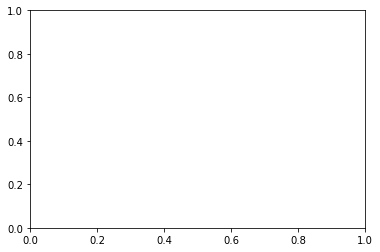

In [41]:
x = list(range(100))
vy = hist.history['val_loss']
ty = hist.history['loss']

plt.plot( x, vy, label='val_loss')
plt.plot( x, ty, label='loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()